In [42]:
#importerer nødvendige funksjoner fra ulike biblioteker og klasser for videre bruk i koden
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score

#legger til src-mappen i systemstien slik at moduler i egen mappe kan importeres
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from data_rens import DataRens
from statistiske_maal import Statistiske_maal
from data_manipulering import DataManipulering
from visualisering import vis_statistikk
from visualisering import visualiser_statistikk_per_tiår
from prediktive_analyser import PrediktivModell

# Skydekke 

* Oppretter et objekt av klassen DataRens og DataManipulering
* Bruker metodene for å opprette en database og konverterer dette til en dataframe 

In [43]:
#Oppretter filstien til JSONfilen
skydekke_fil = "../data/frost_skydekke.json"

#Oppretter et skydekke-objekt i DataRens for videre rens av dataen
rens_skydekke = DataRens()


#Oppretter en database med dataen og lager en dataframe 
database = rens_skydekke.database_opprettelse(skydekke_fil)
df_skydekke = rens_skydekke.fra_database_til_dataframe()


Suksess! JSON er nå omgjort til en database



* Bruker metoder fra Datarens for å rense dataen

In [44]:
#renser dataframen ved å bruke metoder fra DataRens-klassen
df_skydekke_renset = rens_skydekke.rens_DataFrame(df_skydekke)

# Printer ut renset dataframe av skydekke
display("Ferdig renset dataframe: ", df_skydekke_renset)


Antall duplikater funnet: 0
Det er ingen datoer som mangler verdier!


'Ferdig renset dataframe: '

,year,value,unit
0,1980,5.0,octas
1,1981,5.2,octas
2,1982,5.3,octas
3,1983,5.1,octas
4,1984,5.5,octas
5,1985,5.2,octas
6,1986,5.2,octas
7,1987,5.3,octas
8,1988,5.5,octas
9,1989,5.1,octas


*Beregninger*: <br>
Beregningene gjøres i 4 intervaller: <br>
1980-1989 <br>
1990-1999 <br>
2000-2009 <br>
2010-2020 <br>

Samt en beregning for hele intervallet i sin helhet (1980-2020)

**Beregning av gjennomsnitt**


In [45]:
#oppretter et objekt fra statistiske_maal-klassen for å gjøre ulike beregninger
skydekke_mål = Statistiske_maal()

#beregner gjennomsnittlig skydekke for definerte intervaller og totalen
gjennomsnitt_skydekke = skydekke_mål.gjennomsnitt(df_skydekke_renset)

#skriver ut resultatene
print("Gjennomsnitt i 4 intervaller + totalt: ")
for key, value in gjennomsnitt_skydekke.items():
    print(f"{key}: {value} octas")


Gjennomsnitt i 4 intervaller + totalt: 
1980-1989: 5.24 octas
1990-1999: 5.41 octas
2000-2009: 5.58 octas
2010-2020: 5.59 octas
Totalt: 5.46 octas


**Beregning av median**

In [46]:
#beregner medianverdier for ulike intervaller og total
median_skydekke = skydekke_mål.median(df_skydekke_renset)

#printer ut resultatene
print("Median i 4 intervaller + totalt: ")
for key, value in median_skydekke.items():
    print(f"{key}: {value} octas")

Median i 4 intervaller + totalt: 
1980-1989: 5.2 octas
1990-1999: 5.3 octas
2000-2009: 5.6 octas
2010-2020: 5.6 octas
Totalt: 5.5 octas


**Beregning av standardavvik**

In [47]:
#beregner standardavviket for skydekke for hvert intervall i tilegg til totalt
standardavvik_skydekke = skydekke_mål.standardavvik(df_skydekke_renset)

#printer ut resultatet
print("Standardavvik i 4 intervaller + totalt: ")
for key, value in standardavvik_skydekke.items():
    print(f"{key}: {value} octas")

Standardavvik i 4 intervaller + totalt: 
1980-1989: 0.16 octas
1990-1999: 0.26 octas
2000-2009: 0.11 octas
2010-2020: 0.21 octas
Totalt: 0.24 octas


# Visualiseringer

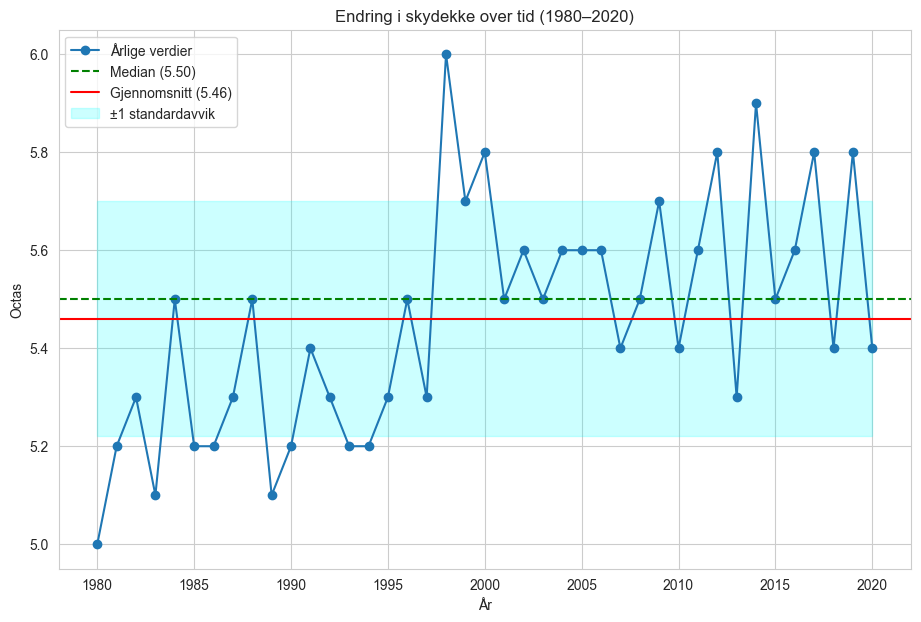

In [48]:
#visualiserer årlige verdier sammen med gjennomsnitt, median og standardavvik
vis_statistikk(
    df_skydekke_renset["year"],
    df_skydekke_renset["value"],
    median=median_skydekke["Totalt"],
    gjennomsnitt=gjennomsnitt_skydekke["Totalt"],
    std=standardavvik_skydekke["Totalt"],
    tittel="Endring i skydekke over tid (1980–2020)",
    y_label="Octas"
)


# Visualisering med seaborn

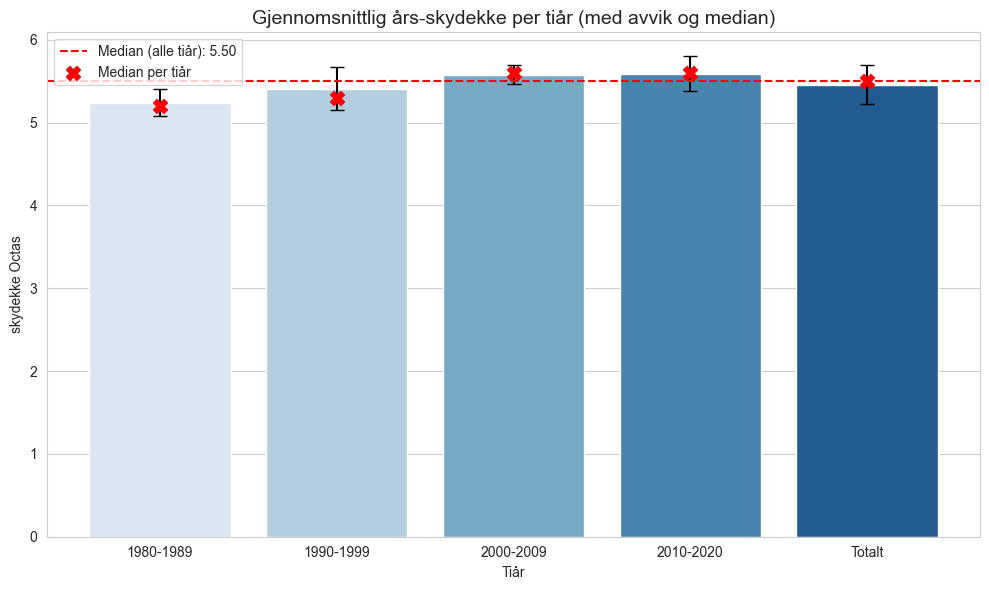

In [49]:
#visualiserer statistiske mål pr. tiår i et søylediagram
visualiser_statistikk_per_tiår(
    gjennomsnitt=gjennomsnitt_skydekke,
    median=median_skydekke,
    standardavvik=standardavvik_skydekke,
    tittel="Gjennomsnittlig års-skydekke per tiår (med avvik og median)",
    ylabel="skydekke Octas"
)

Kommentar til diagrammet: 
labelen til standardavvik kommer ikke med i visualiseringen, koden fungerte i branchen og skal i teorien fungere.

# Lagrer variablene med %store

In [50]:
#lagrer variablene for en samlet visualisering
%store gjennomsnitt_skydekke
%store median_skydekke
%store standardavvik_skydekke
%store df_skydekke_renset

Stored 'gjennomsnitt_skydekke' (dict)
Stored 'median_skydekke' (dict)
Stored 'standardavvik_skydekke' (dict)
Stored 'df_skydekke_renset' (DataFrame)


# Prediktiv analyse

Modellens ytelse: {'MSE': 0.04104729924220999, 'R2': -0.4088267960250056}
Prediksjoner for framtidige år: [5.84962976 5.86327721 5.87692466 5.90421957 6.1908161 ]


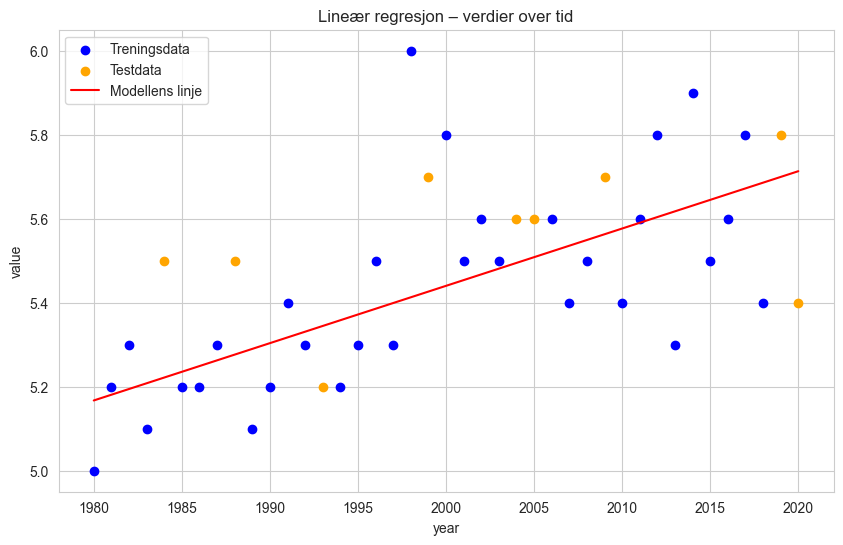

In [51]:
#oppretter en instans av den prediktive modellen
modell = PrediktivModell(df_skydekke_renset, input_col="year", target_col="value")

#deler daten inn i trenings og testsett
modell.del_data()

#trener modellen på treningsdata
modell.tren_modell()

#evaluerer modellens ytelse på testsettet
resultat = modell.evaluer()
print("Modellens ytelse:", resultat)

#predikterer skydekkeverdier for framtidige år
prediksjoner = modell.prediker([2030, 2031, 2032, 2034, 2055])
print("Prediksjoner for framtidige år:", prediksjoner)

# plotter treningsdata, testdata og prediksjonsresultat
modell.plott()


{'MSE': 0.04104729924220999, 'R2': -0.4088267960250056}


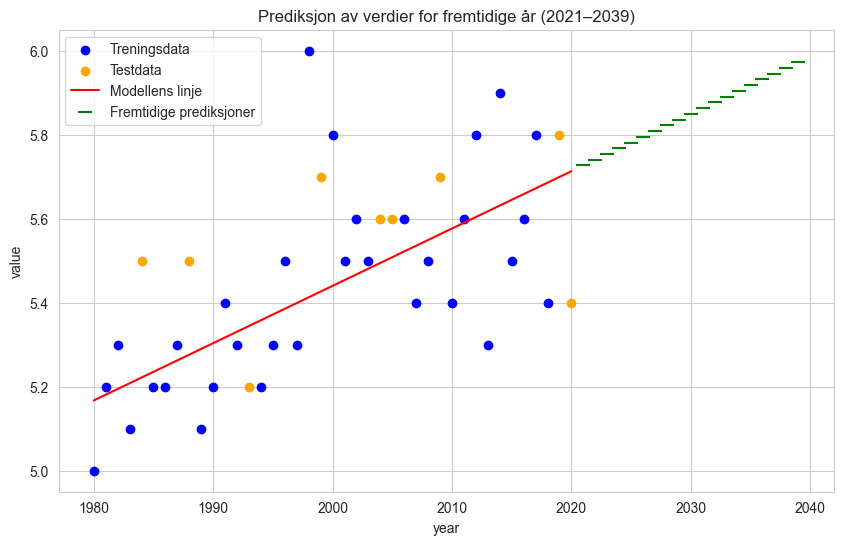

In [52]:
#oppretter en instans av prediktivModell med kolonnene 'year' som input og 'value' som mål
modell = PrediktivModell(df_skydekke_renset, input_col="year", target_col="value")

#deler dataen inn i treningssett og testsett og trener modellen på treningsdataen
modell.del_data()
modell.tren_modell()

#evaluerer modellen og printer ut r2-scoren
print(modell.evaluer())

#oppretter en liste med framtidige år (2021-2039)
framtidige_år = list(range(2021, 2040))

#Lagrer prediksjonene i en variabel for bruk senere, visualiserer prediksjonene
skydekke_pred = modell.prediker(framtidige_år)
modell.visualiser_prediksjon_med_test(framtidige_år)

### Lagrer prediksjonene med %store

In [53]:
%store skydekke_pred

Stored 'skydekke_pred' (ndarray)
